# Redes Neurais Recorrentes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def plot_figs(lst):
    if len(lst) == 1:
        plt.matshow(lst[0], cmap = 'gray', interpolation='nearest')
    else:
        f, axes = plt.subplots(1, len(lst))
        for i, a in enumerate(axes):
            a.matshow(lst[i], cmap = 'gray', interpolation='nearest')
            a.set(aspect='equal')

### Uma RNN manual

RNN - Recurrent Neural Networks são redes neurais em que os neurônios tem como entrada a sua saída. Desta forma, eles podem formar memórias.

Na prática, elas são implementadas como uma arquitetura copiada múltiplas vezes. Há tantas cópias quantas são os instantes de tempo representados no treino. A saída de cada cópia é entrada para a próxima cópia. O exemplo abaixo descreve uma RNN com 3 neurônios de entrada e cinco de saída em uma célula RNN (ou seja, em um instante do tempo). Supondo que temos treinos com 2 instantes de tempo, a rede teria duas céculas, como no diagrama abaixo: 

<img src="images/rnn0.png" alt="Exemplo de RNN" style="width: 600px;"/>

Esta rede pode ser representada da seguinte forma em tensorflow: 

In [3]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
# t = 0
X0_batch = np.array([[0.0, 0.1, 0.2],   # instance 0
                     [0.3, 0.4, 0.5],   # instance 1
                     [0.6, 0.7, 0.8],   # instance 2
                     [0.9, 1.0, 1.1]])  # instance 3
# t = 1
X1_batch = np.array([[1.1, 1.2, 1.3], 
                     [1.4, 1.5, 1.6], 
                     [1.7, 1.8, 1.9], 
                     [2.0, 2.1, 2.2]]) 

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print Y0_val
print Y1_val

[[-0.00664975  0.19543903  0.08291762  0.08832357 -0.1452561 ]
 [ 0.32749006 -0.09047262 -0.3080786   0.20217195 -0.4571744 ]
 [ 0.5958438  -0.3622101  -0.61687875  0.31080633 -0.68643117]
 [ 0.77524525 -0.58375096 -0.8080832   0.4118852  -0.83014977]]
[[ 0.83347845 -0.46762687 -0.8774375   0.15186386 -0.87976223]
 [ 0.91412014 -0.5418827  -0.82953316 -0.377425   -0.9579276 ]
 [ 0.95737094 -0.68740857 -0.8081518  -0.65423906 -0.98491126]
 [ 0.97921664 -0.83296067 -0.8362062  -0.75839305 -0.9942514 ]]


A rede acima pode ser redefinida usando as funções `BasicRNNCell` e `static_rnn`. Note que neste caso, a função retorna tanto as saídas da rede quanto o estado final dela que, neste caso, corresponde a saída para o último intervalo de tempo (o mesmo que `Y1`).

In [5]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs

init = tf.global_variables_initializer()

/home/marco/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# t = 0
X0_batch = np.array([[0.0, 0.1, 0.2],   # instance 0
                     [0.3, 0.4, 0.5],   # instance 1
                     [0.6, 0.7, 0.8],   # instance 2
                     [0.9, 1.0, 1.1]])  # instance 3
# t = 1
X1_batch = np.array([[1.1, 1.2, 1.3], 
                     [1.4, 1.5, 1.6], 
                     [1.7, 1.8, 1.9], 
                     [2.0, 2.1, 2.2]]) 

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print Y0_val
print Y1_val

[[ 0.03175795 -0.03413978 -0.07811595 -0.17084466  0.05769194]
 [ 0.2647824  -0.1855583  -0.09740025 -0.39423943  0.23090008]
 [ 0.4705062  -0.3286492  -0.11661167 -0.57908356  0.39061368]
 [ 0.6352659  -0.45809147 -0.13573624 -0.7188958   0.5298294 ]]
[[ 0.6560341  -0.55838895 -0.17331886 -0.7907961   0.6223338 ]
 [ 0.74668574 -0.7433905  -0.21191065 -0.88804203  0.7498099 ]
 [ 0.819032   -0.85158527 -0.25492802 -0.9409765   0.8342795 ]
 [ 0.87409574 -0.9107835  -0.3030455  -0.96864784  0.88883334]]


No último exemplo, ainda tivemos que criar uma entrada para cada instante de tempo. A seguir, vamos automatizar isso também:

In [7]:
reset_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

In [8]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
# get list of n_steps tensors with shape [None, n_inputs]
Xseqs = tf.unstack(tf.transpose(X, perm = [1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, Xseqs,
                                                dtype=tf.float32)
# merge outputs and get final shape (batches, steps, outputs)
outputs = tf.transpose(tf.stack(output_seqs), perm = [1, 0, 2])

In [9]:
init = tf.global_variables_initializer()

In [10]:
# t = 0
X_batch = np.array([[[0.0, 0.1, 0.2], [1.1, 1.2, 1.3]],   # instance 0
                    [[0.3, 0.4, 0.5], [1.4, 1.5, 1.6]],   # instance 1
                    [[0.6, 0.7, 0.8], [1.7, 1.8, 1.9]],   # instance 2
                    [[0.9, 1.0, 1.1], [2.0, 2.1, 2.2]]])  # instance 3

with tf.Session() as sess:
    init.run()
    out_vals = sess.run(outputs, feed_dict={X: X_batch})
    
print out_vals

[[[-0.04925115 -0.08284049  0.04345951  0.07417858 -0.04935264]
  [-0.31003428 -0.653252    0.2975074   0.7708711  -0.7909568 ]]

 [[-0.10946348 -0.27015626  0.10460903  0.315636   -0.30657732]
  [-0.44478965 -0.74545705  0.48641342  0.8705064  -0.9062193 ]]

 [[-0.16888303 -0.4390344   0.16497768  0.522135   -0.5256635 ]
  [-0.5563627  -0.81515384  0.6256428   0.92795974 -0.95731807]]

 [[-0.22709988 -0.58170485  0.22413501  0.68141353 -0.69185454]
  [-0.64439976 -0.8667141   0.7194453   0.9599478  -0.9795282 ]]]


### Desdobramento dinâmico no tempo

Na prática, contudo, o tensorflow pode poupar todo o trabalho de transposições e mudanças de formas necessárias antes, se usarmos `dynamic_rnn`. De fato, neste caso, o grafo com todas as células para todos instantes no tempo não é realmente criado. O algoritmo usa um laço e controla o processo de atualização de pesos sem consumir tanta memória.

In [11]:
reset_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

In [12]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [13]:
init = tf.global_variables_initializer()

In [14]:
# t = 0
X_batch = np.array([[[0.0, 0.1, 0.2], [1.1, 1.2, 1.3]],   # instance 0
                    [[0.3, 0.4, 0.5], [1.4, 1.5, 1.6]],   # instance 1
                    [[0.6, 0.7, 0.8], [1.7, 1.8, 1.9]],   # instance 2
                    [[0.9, 1.0, 1.1], [2.0, 2.1, 2.2]]])  # instance 3

with tf.Session() as sess:
    init.run()
    out_vals = sess.run(outputs, feed_dict={X: X_batch})
    
print out_vals

[[[-0.00951709 -0.10578336 -0.09923904  0.11355282 -0.13091658]
  [-0.699548   -0.69280183 -0.7597627   0.6514158  -0.33077544]]

 [[-0.25102034 -0.2808916  -0.34448653  0.28298697 -0.18679972]
  [-0.77860713 -0.76589876 -0.84762233  0.7663214  -0.4647188 ]]

 [[-0.46485388 -0.43910304 -0.55027926  0.43642613 -0.24149957]
  [-0.8430165  -0.823422   -0.9065442   0.84661746 -0.5724051 ]]

 [[-0.635429   -0.5740806  -0.70561147  0.56808376 -0.2947066 ]
  [-0.89311767 -0.86889327 -0.94399333  0.899927   -0.652864  ]]]


#### Manipulando sequências com tamanho variável

Em todos os exemplos acima, nossas entradas tinham o mesmo tamanho. Em muitos problemas, este não é o caso. Por exemplo, em classificação de tweets, cada tweet pode ter um tamanho variável.

In [15]:
reset_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

Se a RNN vai receber sequências de tamanhos diferentes, é necessário informar a lista dos tamanhos:

In [16]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
seq_lens = tf.placeholder(tf.float32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                   sequence_length = seq_lens)

In [17]:
init = tf.global_variables_initializer()

E, na entrada, as sequências que tem tamanho menor _tem que ser dadas como zero (padding)_ nos intervalos de tempo que não irão aparecer. Por exemplo, supondo que em nosso exemplo anterior, a segunda instância fosse observada apenas no tempo 0 (sequência de tamanho 1), teríamos:

In [18]:
# t = 0
X_batch = np.array([[[0.0, 0.1, 0.2], [1.1, 1.2, 1.3]],   # instance 0
                    [[0.3, 0.4, 0.5], [0, 0, 0]],         # instance 1 -- padding
                    [[0.6, 0.7, 0.8], [1.7, 1.8, 1.9]],   # instance 2
                    [[0.9, 1.0, 1.1], [2.0, 2.1, 2.2]]])  # instance 3

with tf.Session() as sess:
    init.run()
    out_vals, state_vals = sess.run([outputs, states], 
                        feed_dict={X: X_batch, seq_lens: [2,1,2,2]})
    
print out_vals

[[[-0.01166807  0.0971556   0.07514036 -0.00826832 -0.01160519]
  [ 0.5539567   0.7743753   0.85887074 -0.5137783  -0.02760338]]

 [[ 0.15761368  0.31775504  0.3656853  -0.15256876 -0.03202407]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.31811264  0.5085952   0.5989987  -0.29064465 -0.05241627]
  [ 0.6873672   0.9695287   0.98071724 -0.5624252   0.35523304]]

 [[ 0.46223748  0.6598332   0.7614829  -0.41759136 -0.07276482]
  [ 0.73895097  0.98709494  0.9919584  -0.5996696   0.4650087 ]]]


Note que as saídas para o tempo 2 para a segunda instância são zero. Além disso, observe que o estado final da segunda instância corresponde, de fato, ao seu valor no tempo 0:

In [19]:
print state_vals

[[ 0.5539567   0.7743753   0.85887074 -0.5137783  -0.02760338]
 [ 0.15761368  0.31775504  0.3656853  -0.15256876 -0.03202407]
 [ 0.6873672   0.9695287   0.98071724 -0.5624252   0.35523304]
 [ 0.73895097  0.98709494  0.9919584  -0.5996696   0.4650087 ]]


Para o caso em que a saída tem tamanho variável, o reconhecimento do fim prematuro será modelado na própria rede. Por exemplo, em tradução, a rede deve emitir uma frase com um número não previamente conhecido de palavras. Assim, a rede deve emitir cada palavra e, quando considerar pertinente, ela emite uma palavra especial que indica _fim de frase_. Ao analisar a saída da rede, são consideradas apenas as palavras observadas antes de _fim de frase_.

#### O mesmo código em Keras

In [21]:
# Recurrent Neural Network
from keras.models import Model
from keras.layers import Input, Dense, SimpleRNN

# time_steps, input_length
visible = Input(shape=(2, 3))
# return_sequences = False (default): output.shaep is (5), ie, output from last timestep
# return_sequences = True: output.shaep is (2, 5), ie, output from all timesteps; 
output = SimpleRNN(5, return_sequences = True)(visible)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2, 3)              0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 2, 5)              45        
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
None


## Classificando MNIST

A ideia de classificar as imagens da MNIST usando uma RNN consiste em considerar que cada imagem é formada por uma sequência de linhas de pixels, cada linha vista em um instante de tempo. 

In [22]:
n_steps = 28
n_inputs = 28

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


Vamos construir uma rede em que cada célula RNN tem 150 neurônios. O estado final da RNN (um código com 150 valores) então será entrada para uma rede densa com dez neurônios agregados via softmax, como ilustrado abaixo (nós vermelhos com dimensão 28, verdes com dimensão 150 e azul com dimensão 10; 28 desdobramentos no tempo). 

<img src="images/rnn1.png" alt="Exemplo de RNN" style="width: 600px;"/>

In [38]:
n_neurons = 150
n_outputs = 10

In [39]:
# Recurrent Neural Network
from keras.models import Model
from keras.layers import Input, Dense, SimpleRNN

# time_steps, input_length
visible = Input(shape=(n_steps, n_inputs))
hidden = SimpleRNN(n_neurons, return_sequences = False)(visible)
output = Dense(n_outputs, activation = 'softmax')(hidden)

model = Model(inputs=visible, outputs=output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 150)               26850     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 28,360
Trainable params: 28,360
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
from keras.utils import to_categorical
train_images = mnist.train.images.reshape((55000, 28, 28))
train_labels = to_categorical(mnist.train.labels)

Vamos treinar a nossa rede usando batches de 150 instâncias: 

In [36]:
n_epochs = 10
batch_size = 150
history = model.fit(train_images, train_labels, epochs = n_epochs, 
                    batch_size = batch_size, validation_split = 0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/10
49500/49500 [==============================] - 3s - loss: 0.4541 - acc: 0.8647 - val_loss: 0.1886 - val_acc: 0.9455
Epoch 2/10
49500/49500 [==============================] - 3s - loss: 0.1925 - acc: 0.9430 - val_loss: 0.1344 - val_acc: 0.9647
Epoch 3/10
49500/49500 [==============================] - 3s - loss: 0.1527 - acc: 0.9560 - val_loss: 0.0920 - val_acc: 0.9747
Epoch 4/10
49500/49500 [==============================] - 3s - loss: 0.1228 - acc: 0.9636 - val_loss: 0.1005 - val_acc: 0.9716
Epoch 5/10
49500/49500 [==============================] - 3s - loss: 0.1112 - acc: 0.9674 - val_loss: 0.0797 - val_acc: 0.9775
Epoch 6/10
49500/49500 [==============================] - 3s - loss: 0.1024 - acc: 0.9693 - val_loss: 0.0811 - val_acc: 0.9773
Epoch 7/10
49500/49500 [==============================] - 3s - loss: 0.0928 - acc: 0.9724 - val_loss: 0.0814 - val_acc: 0.9765
Epoch 8/10
49500/49500 [==============================] - 3s -

E em tensorflow puro?

```python
reset_graph()

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.nn.in_top_k(logits, y, 1), 
                                  tf.float32))

init = tf.global_variables_initializer()

```

Treinamento com batches de 150 instâncias: 

```python
with tf.Session() as s:
    init.run()
    for e in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            s.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print '%d - accuracy tr: %.6f test: %.6f' % (e, acc_train, acc_test)
```

## Classificando MNIST com uma RNN de 2 camadas

Vamos agora modificar nossa RNN para suportar 2 camadas, como no diagrama a seguir:

<img src="images/rnn1multi.png" alt="Exemplo de RNN" style="width: 700px;"/>

Para implementar múltiplas camadas em uma RNN com Keras basta empilhá-las. É claro, desta vez, cada camada anterior deve fornecer tanto saídas quanto estados:

In [41]:
# time_steps, input_length
visible = Input(shape=(n_steps, n_inputs))
h1 = SimpleRNN(n_neurons, return_sequences = True)(visible)
h2 = SimpleRNN(n_neurons, return_sequences = False)(h1)
output = Dense(n_outputs, activation = 'softmax')(h2)

model = Model(inputs=visible, outputs=output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 28, 150)           26850     
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 150)               45150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 73,510
Trainable params: 73,510
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(train_images, train_labels, epochs = n_epochs, 
                    batch_size = batch_size, validation_split = 0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/10
49500/49500 [==============================] - 7s - loss: 0.3596 - acc: 0.8897 - val_loss: 0.1429 - val_acc: 0.9589
Epoch 2/10
49500/49500 [==============================] - 6s - loss: 0.1639 - acc: 0.9513 - val_loss: 0.1143 - val_acc: 0.9655
Epoch 3/10
49500/49500 [==============================] - 5s - loss: 0.1235 - acc: 0.9637 - val_loss: 0.1441 - val_acc: 0.9595
Epoch 4/10
49500/49500 [==============================] - 5s - loss: 0.1069 - acc: 0.9677 - val_loss: 0.0928 - val_acc: 0.9718
Epoch 5/10
49500/49500 [==============================] - 6s - loss: 0.0969 - acc: 0.9707 - val_loss: 0.0873 - val_acc: 0.9735
Epoch 6/10
49500/49500 [==============================] - 6s - loss: 0.0897 - acc: 0.9724 - val_loss: 0.0860 - val_acc: 0.9744
Epoch 7/10
49500/49500 [==============================] - 6s - loss: 0.0852 - acc: 0.9744 - val_loss: 0.0889 - val_acc: 0.9749
Epoch 8/10
49500/49500 [==============================] - 6s -

Note contudo que nossa arquitetura anterior não corresponde exatamente ao diagrama dado, uma vez que a decisão final da rede depende apenas do último estado da última camada. No diagrama, ao contrário, ela depende dos estados finais das duas camadas. Agora que a rede tem tantos estados finais quanto camadas, a representação a ser fornecida para a rede densa pode envolver qualquer agregação dos estados finais. Abaixo, fornecemos uma representação precisa do diagrama dado, modelando a decisão como a concatenação dos estados finais.

In [64]:
from keras.layers.merge import Concatenate
from keras.layers import Lambda

# time_steps, input_length
visible = Input(shape=(n_steps, n_inputs))
h1 = SimpleRNN(n_neurons, return_sequences = True)(visible)
h2 = SimpleRNN(n_neurons, return_sequences = False)(h1)
h1_last = Lambda(lambda x: x[:,-1,:])(h1)
merge = Concatenate()([h1_last, h2])
output = Dense(n_outputs, activation = 'softmax')(merge)

model = Model(inputs=visible, outputs=output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

Um detalhe importante desta implementação é o uso de uma camada Lambda do Keras. Ela permite que do tensor de entrada h1 (com shape (batch_size, n_layers, n_neurons)) sejam obtidos apenas os estados da última camada (ou seja, x[:, -1, :] para x correspondendo ao valor de h1). O estado obtido (h1_last) é concatenado com o estado final da última camada (h2) e dado como entrada para a camada densa. Camadas Lambda permitem que transformações arbitrárias sejam executadas sobre os dados fluindo entre as camadas.

In [65]:
# summarize layers
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_29 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
simple_rnn_51 (SimpleRNN)        (None, 28, 150)       26850       input_29[0][0]                   
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 150)           0           simple_rnn_51[0][0]              
____________________________________________________________________________________________________
simple_rnn_52 (SimpleRNN)        (None, 150)           45150       simple_rnn_51[0][0]              
___________________________________________________________________________________________

In [63]:
history = model.fit(train_images, train_labels, epochs = n_epochs, 
                    batch_size = batch_size, validation_split = 0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/10
49500/49500 [==============================] - 8s - loss: 0.3745 - acc: 0.8830 - val_loss: 0.1339 - val_acc: 0.9609
Epoch 2/10
49500/49500 [==============================] - 6s - loss: 0.1573 - acc: 0.9526 - val_loss: 0.1215 - val_acc: 0.9635
Epoch 3/10
49500/49500 [==============================] - 5s - loss: 0.1271 - acc: 0.9607 - val_loss: 0.1101 - val_acc: 0.9716
Epoch 4/10
49500/49500 [==============================] - 5s - loss: 0.1089 - acc: 0.9668 - val_loss: 0.0980 - val_acc: 0.9709
Epoch 5/10
49500/49500 [==============================] - 5s - loss: 0.0936 - acc: 0.9721 - val_loss: 0.0884 - val_acc: 0.9735
Epoch 6/10
49500/49500 [==============================] - 5s - loss: 0.0948 - acc: 0.9714 - val_loss: 0.1217 - val_acc: 0.9645
Epoch 7/10
49500/49500 [==============================] - 6s - loss: 0.0905 - acc: 0.9722 - val_loss: 0.0969 - val_acc: 0.9751
Epoch 8/10
49500/49500 [==============================] - 6s -

## Prevendo séries de tempo
### Um modelo $n \times n$

Um dos problemas mais comuns em aprendizado de sequência/temporal é previsão de séries de tempo. Neste caso, dada um evento no tempo, o modelo deve prever o resultado do evento no tempo seguinte. Vamos tomar como exemplo o número de passageiros mensal nos EUA entre 1949 e 1961:

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

airline = pd.read_csv('data/airline.csv')

/Users/marcocristo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
airline.head(5)

,passengers,date
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


In [3]:
len(airline)

144

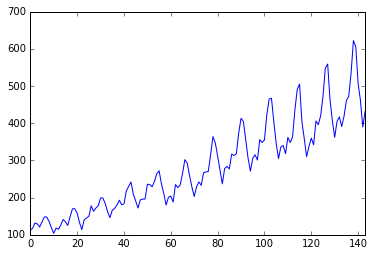

In [4]:
series = airline['passengers']
series.plot()

Vamos agora preparar a série para supervisão. A idéia é que cada quantidade de passageiros em um certo momento no tempo seja uma variável útil para prever a quantidade no próximo momento no tempo. Vamos usar a operação shift() do pandas para isso:

In [5]:
def transform_data(series, target, lag = 1):
    # transfor to supervised learning
    series = series.iloc[1:]
    series = pd.concat([series.shift(1), series], axis = 1)
    series.fillna(0, inplace=True)
    return series

In [6]:
supervised = transform_data(series, 'passengers')
supervised_values = supervised.values
supervised.head()

,passengers,passengers
1,0.0,118
2,118.0,132
3,132.0,129
4,129.0,121
5,121.0,135


Agora podemos separar os dados em treino e teste, onde o teste corresponde ao horizonte de tempo para o qual prentendemos fazer previsões. Por exemplo, vamos considerar um horizonte de 40 meses:

In [7]:
horizon = 40
train, test = supervised_values[0:-horizon], supervised_values[-horizon:]

Antes de iniciar qualquer previsão, os dados devem ser escalados. Aqui vamos usar uma escala simples para colocar os dados entre -1 e 1:

In [8]:
from sklearn.preprocessing import MinMaxScaler

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [9]:
scaler, train_scaled, test_scaled = scale(train, test)

In [10]:
train_scaled[:4]

array([[-1.        , -0.92286501],
       [-0.49247312, -0.84573003],
       [-0.43225806, -0.86225895],
       [-0.44516129, -0.90633609]])

In [11]:
train_scaled[:, 0:-1].shape

(103, 1)

Uma vez escalados os dados, podemos treinar a RNN. Neste caso, vamos usar células LSTM. Em particular, consideramos que cada entrada tenha batch_size = 1, se refira a apenas 1 passo de tempo e tem entrada de comprimento 1 (ou seja, se refere a uma única quantidade de passageiros e nenhuma informação adicional). Como este problema é simples, serão usadas células LSTM com apenas 4 blocos.

Como queremos que as células lembrem do estado da computação deixada pelo último batch da época atual, deixamos stateful = True. Assim, mesmo embora a entrada tenha apenas 1 passo de tempo, a rede vai ser influenciada por tantos passos de tempo quanto forem os batches processados ao longo da época. Para isso, vamos treinar cada época por vez, executando os batches na ordem temporal (ou seja, shuffle = False). Como a rede é _stateful_, o estado de um batch é enviado ao próximo até que todos tenham sido processados. Neste ponto, reiniciamos o estado da rede, antes de começar uma nova época.

In [12]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    visible = Input(batch_shape=(batch_size, X.shape[1], X.shape[2]))
    hidden = LSTM(neurons, stateful=True)(visible)
    output = Dense(1)(hidden)
    model = Model(inputs = visible, outputs = output)
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, 
                  verbose=1, shuffle=False)
        model.reset_states()
    return model

/Users/marcocristo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Abaixo, treinamos nossa LSTM para 100 épocas:

In [ ]:
lstm_model = fit_lstm(train_scaled, 1, 100, 4)

Finalmente, podemos usar o modelo para prever a série. Para cada elemento do conjunto de teste (X), o modelo prevê o próximo valor (yhat). O valor previsto yhat é corrigido em escala e adicionado ao conjunto de previsões:

In [14]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [43]:
predictions = []
for i in range(len(test_scaled)):
    # make one-step forecast
    X = test_scaled[i, 0:-1] 
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions += [yhat]

O desempenho final obtido pode ser medido em termos de RMSE e observado graficamente:

In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# report performance
rmse = sqrt(mean_squared_error(series.values[-horizon:], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 46.845


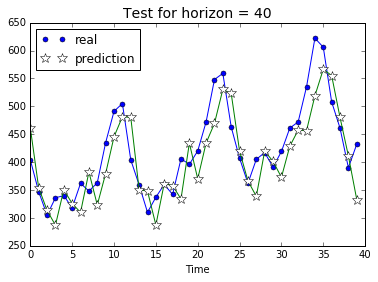

In [45]:
plt.title("Test for horizon = " + str(horizon), fontsize=14)
plt.plot(series.values[-horizon:], "-", markersize=5)
plt.plot(series.values[-horizon:], "bo", markersize=5, label="real")
plt.plot(predictions, "-", markersize=10)
plt.plot(predictions, "w*", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

Material derivado do livro _Handson Machine Learning with Scikit-learn and Tensorflow_, de Aurélian Géron. A aula sobre Keras usado como previsor de séries de tempo foi baseada no material de Jason Browlee, disponível em https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/.